# Algorithme de descente de gradient

## Optimisation de fonctions

In [91]:
%matplotlib inline
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def make_grid(xmin=-5,xmax=5,ymin=-5,ymax=5,step=20,data=None):
    """ Cree une grille sous forme de matrice 2d de la liste des points
    :return: une matrice 2d contenant les points de la grille, la liste x, la liste y
    """
    if data is not None:
        xmax,xmin,ymax,ymin = np.max(data[:,0]),np.min(data[:,0]),\
                              np.max(data[:,1]),np.min(data[:,1])
    x,y = np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)*1./step),
                      np.arange(ymin,ymax,(ymax-ymin)*1./step))
    grid=np.c_[x.ravel(),y.ravel()]
    return grid, x, y



def load_usps(filename):
    with open(filename,"r") as f:
        f.readline()
        data =[ [float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)




In [118]:
def optimise(fonc,dfonc,xinit, eps,max_iter):
    """ Implémentation de l'algorithme de descente de gradient
    fonc -> la fonction à optimiser.
    dfonc -> le gradient de cette fonction
    xinit -> le point initial
    eps -> Le pas de gradient 
    max_iter -> Le nombre d'itérations.
    return : triplet (x_histo,f_histo,grad_histo) respectivement la liste des points xt, f(xt), gradient(f(xt)) 
    """
 
    X = [xinit]
    fX = [fonc(xinit)]
    dfX = [dfonc(xinit)]
    for i in range(max_iter):
        xinit = xinit - eps*dfonc(xinit)
        X.append(xinit)
        fX.append(fonc(xinit))
        dfX.append(dfonc(xinit))
    
    return np.array(X),np.array(fX),np.array(dfX)


def xcosx(x):
    return x*np.cos(x)

def dxcosx(x):
    return np.cos(x) - x*np.sin(x)

def logx(x):
    return -np.log(x) + x**2

def dlogx(x):
    return (-1/x) + 2*x

def rosenBrock(x1,x2):
    return 100*(x2-x1**2)**2 +(1 - x1)**2

def drosenBrock(x1,x2):
    return (-400*x1*(x2-x1**2)-2*(1-x1),200*(x2-x1**2))


## Affichage 2D  

In [119]:
def affiche2d(fonc,dfonc,xinit,eps,max_iter):
    """Affiche en fonction du nombre d'itérations les valeurs de fX et du gradient de f."""
    
    absi = [i for i in range(max_iter+1)]
    X,fX,dfX = optimise(fonc,dfonc,xinit,eps,max_iter)
    plt.plot(absi,fX,'r',absi,dfX,'b',absi,X,'g')
    plt.show()
    #plt.close()


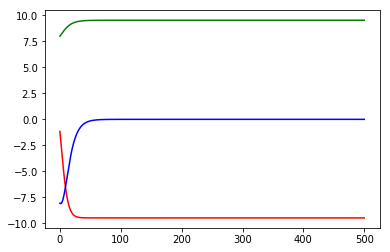

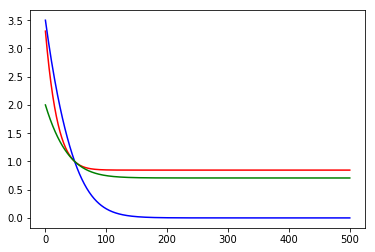

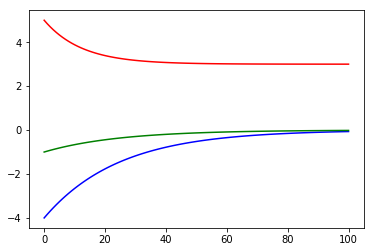

In [120]:
affiche2d(xcosx,dxcosx,random.randint(10),0.01,500)
affiche2d(logx,dlogx,random.randint(1,10),0.01,500)
affiche2d(fx,dfx,-1,0.01,100)

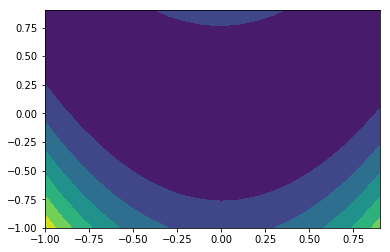

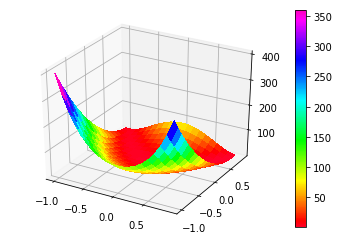

In [141]:
## Grille de discretisation
grid , xx , yy = make_grid(xmin=-1,xmax=1,ymin=-1,ymax=1)
t = np.array([rosenBrock(c[0],c[1]) for c in grid]).reshape(xx.shape)
## Affichage 2D
plt.contourf(xx,yy,t)
fig = plt.figure()
## construction d’un referentiel 3d
ax = fig.gca( projection='3d')
surf = ax.plot_surface(xx,yy,t,rstride=1,cstride=1,\
cmap=cm.gist_rainbow,linewidth=0,antialiased=False)
fig.colorbar(surf)
#x_histo = np.array([drosenBrock(c[0],c[1]) for c in grid])
#ax.plot(x_histo[:,0],x_histo[:,1],f_histo.ravel(),color='black')
plt.show()

# Régression logistique


In [166]:
class Regression_Logistique:
    
    def __init__(self,eps,max_iter):
        self.eps = eps
        self.max_iter = max_iter
        self.w = None
        self.b = None
    
    def fit(self,datax,datay):
        
        # initialisation des parametres
        self.b = random.random()
        self.w = np.random.rand(datax.shape[1])
        
        

        


In [194]:
X,Y = load_usps("./USPS_train.txt")
data1 = np.where(Y == 1,1,0)
data5 = np.where(Y == 5,1,0)
regression = Regression_Logistique(0.01,1000)
regression.fit(X,Y)
w = np.random.rand(X.shape[1])
print(np.matmul(X[1],w))
print(Y[1])
print(data1[:100])
print(data5[:100])
d = data1+data5
print(d[:100])

117.00019725937342
5
[0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
